In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def make_coord(x,y):
    a = np.array([[[x,y]]])
    coordinate = np.tile(a,(x,y,1))
    for i in range(x):
        for j in range(y):
            coordinate[i][j]=[i,j]
    return coordinate

In [3]:
def make_base(x,y):
    a = np.array([[[0,0]]])
    base = np.tile(a,(x,y,1))
    return base

In [4]:
def calc_dist(coord,base):
    a = base-coord
    b = np.sum(np.square(a), axis=2)
    c = np.sqrt(b)
    return c

In [93]:
filter = ["ul","b","v","w","x","p","zs"]
alpha = {"ul":1.26,"b":1.28,"v":1.41,"w":1.85,"x":1.85,"p":1.60,"zs":1.48}
Ai = {"ul":{"1":12.0,"2":8.0,"3":1.2,"4":1.0,"5":0.8,"6":0.7},
      "b":{"1":10.0,"2":1.5,"3":0.3,"4":0.4,"5":0.4,"6":0.5},
      "v":{"1":10.0,"2":1.5,"3":0.3,"4":0.4,"5":0.4,"6":0.5},
      "w":{"1":10.0,"2":1.5,"3":0.6,"4":0.8,"5":0.7,"6":0.6},
      "x":{"1":9.0,"2":3.5,"3":2.0,"4":2.7,"5":2.2,"6":0.5},
      "p":{"1":10.0,"2":5.0,"3":8.3,"4":4.0,"5":6.4,"6":1.8},
      "zs":{"1":50.0,"2":16.0,"3":6.0,"4":9.0,"5":9.5,"6":4.5}
}
coord = 0
sigma = [8,16,32,64,110,710]
xs = 1024
ys = 1024
coord = make_coord(xs,ys)
base = make_base(xs,ys)
r = calc_dist(coord,base)

In [50]:
type(alpha["ul"])
r[1][1]
np.array(b)

list

In [6]:
a = r.reshape(-1)
print(len(a))
b = pd.unique(a).tolist()
print(b[0])



1048576
0.0


In [7]:
for f in filter:
    filter_u = Ai[f]
    print(filter_u)

{'1': 50.0, '2': 16.0, '3': 6.0, '4': 9.0, '5': 9.5, '6': 4.5}
{'1': 10.0, '2': 1.5, '3': 0.3, '4': 0.4, '5': 0.4, '6': 0.5}
{'1': 12.0, '2': 8.0, '3': 1.2, '4': 1.0, '5': 0.8, '6': 0.7}
{'1': 10.0, '2': 5.0, '3': 8.3, '4': 4.0, '5': 6.4, '6': 1.8}
{'1': 10.0, '2': 1.5, '3': 0.3, '4': 0.4, '5': 0.4, '6': 0.5}
{'1': 9.0, '2': 3.5, '3': 2.0, '4': 2.7, '5': 2.2, '6': 0.5}
{'1': 10.0, '2': 1.5, '3': 0.6, '4': 0.8, '5': 0.7, '6': 0.6}


In [51]:
for f in filter:
    filter_u = Ai[f]
    name_ufoc = "fufoc_" + f
    name_foc = "ffoc_" + f
    name_psf = "psf_" + f
    globals()[name_ufoc] = 0
    globals()[name_foc] = 0
    globals()[name_psf] = 0
    for k in range(6):
        num = str(k + 1)
        globals()[name_ufoc] = globals()[name_ufoc] + ((filter_u[num]*np.power(10.,-4))/(np.sqrt(2*np.pi)*sigma[k]))*np.exp(-np.power(b,2)/(2*np.power(sigma[k],2)))
    globals()[name_foc] = np.exp(-alpha[f]*np.array(b))
    globals()[name_psf] = globals()[name_foc] + globals()[name_ufoc]


In [30]:
hdulist = fits.open("../../gra/HAY_A_AMICA_3_HAYAMICA_V1_0/data/20050929/st_2418807291_p.fit")
hdu = hdulist[0]
data = hdu.data
header = hdu.header

In [74]:
def f_ufoc(r, A, sigmas, N):
    result = 0

    for i in range(N):
        result += (A[str(i+1)]*np.power(10.,-4)) / (np.sqrt(2*np.pi)*sigmas[i]) * np.exp(-np.power(r,2) / (2*np.power(sigmas[i],2)))

    return result

def f_foc(r,a):
    result = 0


    result = np.exp(-a*np.array(r))

    return result

def get_r_and_psf(As, alphas, f, N=6):
    A = As[f]
    alpha = alphas[f]
    r = np.logspace(-1, 3, num=1000)
    result_f_ufoc = np.array(list(map(lambda x: f_ufoc(x, A, sigma, N), r)))
    result_f_foc = np.array(list(map(lambda x: f_foc(x,alpha), r)))
    result_psf = result_f_ufoc + result_f_foc

    return (r, result_psf)

In [84]:
styles = [(0, (1, 1)),(0, (2, 2)),(0, (5, 2)),'-',(0, (5, 2, 1, 2)),(0, (5, 1)),(0, (1, 0))]

In [92]:
type(filter)

set

In [ ]:
result = []
fig, ax = plt.subplots()
r = np.logspace(-1, 3, num=1000)
ax.set_xscale('log')
ax.set_xlim(10**(-1), 10**3)
ax.set_yscale('log')
ax.yaxis.tick_right()
ax.set_ylim(10**(-9), 1)
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(numticks=13))
ax.yaxis.set_minor_locator(mpl.ticker.LogLocator(numticks = 13, subs = (.1, .2, .3, .4, .5, .6, .7, .8, .9)))
for i,f in enumerate(filter):
    print(i, f)
    r, result = get_r_and_psf(Ai, alpha, f)
    ax.plot(r, result,linestyle=styles[i],label = f)
plt.legend(loc = 'upper right') 
plt.savefig("psf.pdf")
plt.show()

0 ul
1 b
2 v
3 w
4 x
5 p
6 zs


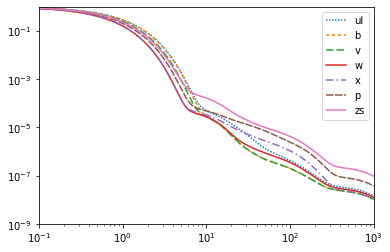

In [95]:
for i,f in enumerate(filter):
    print(i, f)
    r, result = get_r_and_psf(Ai, alpha, f)
    plt.plot(r, result,linestyle=styles[i],label = f)
plt.xscale('log')
plt.xlim(10**(-1), 10**3)
plt.yscale('log')
plt.ylim(10**(-9), 1)
plt.legend(loc = 'upper right') 
plt.savefig("psf.pdf")
plt.show()


In [ ]:
print(max(fufoc_p))

7.759794498192039e-05


In [59]:
def has_duplicates(seq):
    return len(seq) != len(set(seq))

print(has_duplicates(b))

False


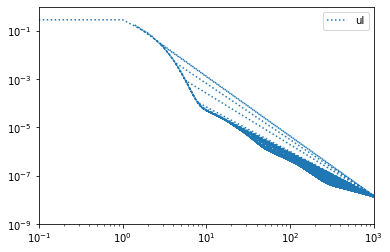

In [66]:
plt.plot(b,psf_ul,':',label = 'ul')
# plt.plot(b,psf_b,'.',label = 'b')
# plt.plot(b,psf_v,'+',label = 'v')
# plt.plot(b,psf_w,'*',label = 'w')
# plt.plot(b,psf_x,'4',label = 'x')
# plt.plot(b,psf_p,'2',label = 'p')
# plt.plot(b,psf_zs,'3',label = 'zs')
plt.xscale('log')
plt.xlim(10**(-1), 10**3)
plt.yscale('log')
plt.ylim(10**(-9), 1)
plt.legend(loc = 'upper right') 
plt.show()

In [ ]:
aa = 0
for k in range(6):
        num = str(k + 1)
        aa = aa+ ((filter_u[num]*np.power(10.,-4))/(np.sqrt(2*np.pi)*sigma[k]))*np.exp(-np.power(b,2)/(2*np.power(sigma[k],2)))
        print(aa[0])

4.488100654516119e-05
5.360786892894253e-05
5.610125818145148e-05
5.778429592689503e-05
5.8582180487697896e-05
5.861027501448673e-05
